In [1]:
#Import Libraries
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sgt import SGT
import os 

# Training Experience: Faculty: Subjects 10

## Top Con - No Bias Boxes

### Healthy

In [2]:
#Read Corpus
path10 = '../../TOP_CON/Healthy/Healthy(10)/'
paths = [path10]


def load_files(path):
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                new_path = i + filename 
                yield pd.read_csv(new_path)


corpus_healthy = pd.concat(load_files(paths))


In [3]:
def equal_boxes(x,y):
    arr = []
    for i,j in zip(x,y):
        if 0<i and 0.25 > i and 0<j and 0.25 > j: 
            arr.append('A')
        elif 0.25<i and 0.5 > i and 0<j and 0.25 > j: 
            arr.append('B')
        elif 0.5<i and 0.75 > i and 0<j and 0.25 > j: 
            arr.append('C')
        elif 0.75<i and 1 > i and 0<j and 0.25 > j: 
            arr.append('D')
        elif 0<i and 0.25 > i and 0.25<j and 0.5 > j: 
            arr.append('E')
        elif 0.25<i and 0.5 > i and 0.25<j and 0.5 > j: 
            arr.append('F')
        elif 0.5<i and 0.75 > i and 0.25<j and 0.5 > j: 
            arr.append('G')
        elif 0.75<i and 1 > i and 0.25<j and 0.5 > j: 
            arr.append('H')
        elif 0<i and 0.25 > i and 0.5<j and 0.75 > j: 
            arr.append('I')
        elif 0.25<i and 0.5 > i and 0.5<j and 0.75 > j: 
            arr.append('J')
        elif 0.5<i and 0.75 > i and 0.5<j and 0.75 > j: 
            arr.append('K')
        elif 0.75<i and 1 > i and 0.5<j and 0.75 > j: 
            arr.append('L')
        elif 0<i and 0.25 > i and 0.75<j and 1 > j: 
            arr.append('M')
        elif 0.25<i and 0.5 > i and 0.75<j and 1 > j: 
            arr.append('N')
        elif 0.5<i and 0.75 > i and 0.75<j and 1 > j: 
            arr.append('O')
        elif 0.75<i and 1 > i and 0.75<j and 1 > j: 
            arr.append('P')
        else: 
            arr.append('error')
    return arr

x = corpus_healthy.norm_pos_x
y = corpus_healthy.norm_pos_y
arr = equal_boxes(x,y)

In [4]:
def make_corpus(corpus_new):
    A = np.array(corpus_new.fixation_id[corpus_new.letters=='A'])
    B = np.array(corpus_new.fixation_id[corpus_new.letters=='B'])
    C = np.array(corpus_new.fixation_id[corpus_new.letters=='C'])
    D = np.array(corpus_new.fixation_id[corpus_new.letters=='D'])
    E = np.array(corpus_new.fixation_id[corpus_new.letters=='E'])
    F = np.array(corpus_new.fixation_id[corpus_new.letters=='F'])
    G = np.array(corpus_new.fixation_id[corpus_new.letters=='G'])
    H = np.array(corpus_new.fixation_id[corpus_new.letters=='H'])
    I = np.array(corpus_new.fixation_id[corpus_new.letters=='I'])
    J = np.array(corpus_new.fixation_id[corpus_new.letters=='J'])
    K = np.array(corpus_new.fixation_id[corpus_new.letters=='K'])
    L = np.array(corpus_new.fixation_id[corpus_new.letters=='L'])
    M = np.array(corpus_new.fixation_id[corpus_new.letters=='M'])
    N = np.array(corpus_new.fixation_id[corpus_new.letters=='N'])
    O = np.array(corpus_new.fixation_id[corpus_new.letters=='O'])
    P = np.array(corpus_new.fixation_id[corpus_new.letters=='P'])
    corpus = pd.DataFrame([[1, A], 
                           [2, B],
                           [3, C], 
                           [4, D], 
                           [5, E], 
                           [6, F],
                           [7, G], 
                           [8, H], 
                           [9, I], 
                           [10, J],
                           [11, K], 
                           [12, L], 
                           [13, M], 
                           [14, N],
                           [15, O], 
                           [16, P]], 
                          columns=['id', 'sequence'])
    return corpus

corpus = corpus_healthy
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus(corpus_new)

In [5]:
corpus

,id,sequence
0,1,"[300, 304, 304, 305, 305, 306, 306, 306, 307, ..."
1,2,"[289, 290, 291, 311, 311, 1955, 1955, 1958, 19..."
2,3,"[285, 285, 286, 286, 287, 287, 288, 288, 325, ..."
3,4,"[282, 282, 282, 283, 283, 283, 284, 284, 323, ..."
4,5,"[296, 297, 297, 298, 298, 299, 299, 300, 317, ..."
5,6,"[295, 318, 318, 319, 319, 710, 710, 1956, 1771..."
6,7,"[324, 324, 1953, 1966, 1966, 1966, 1783, 1783,..."
7,8,"[1782, 1053, 1053, 1053, 2026, 2026, 2026, 202..."
8,9,"[315, 316, 316, 316, 714, 714, 716, 1809, 1811..."
9,10,"[292, 293, 293, 293, 294, 294, 301, 301, 302, ..."


In [6]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')


INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [7]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])


/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


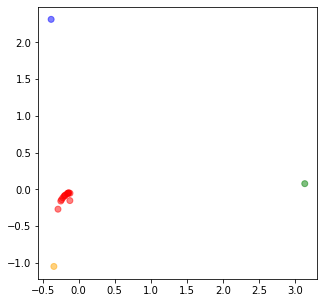

In [8]:
kmeans = KMeans(n_clusters=4, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'red', 2: 'green', 3: 'blue', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [9]:
df['labels'] = colors
df

,x1,x2,labels
0,-0.237512,-0.138664,red
1,-0.248363,-0.158324,red
2,-0.287192,-0.269305,red
3,-0.344073,-1.048365,orange
4,-0.219425,-0.113234,red
5,-0.201177,-0.092285,red
6,-0.184218,-0.076822,red
7,-0.152125,-0.054090,red
8,-0.193564,-0.084242,red
9,-0.382237,2.313656,blue


### Glaucoma

In [11]:
#Read Corpus
path10 = '../../TOP_CON/Glaucoma/Glaucoma(10)/'
paths = [path10]


def load_files(path):
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                new_path = i + filename 
                yield pd.read_csv(new_path)


corpus_diseased = pd.concat(load_files(paths))



In [12]:
x = corpus_diseased.norm_pos_x
y = corpus_diseased.norm_pos_y
arr = equal_boxes(x,y)

corpus = corpus_diseased
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus(corpus_new)

In [13]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')

INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [14]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])

/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


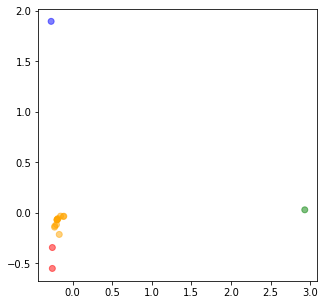

In [15]:
kmeans = KMeans(n_clusters=4, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'red', 2: 'green', 3: 'blue', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [16]:
df['labels'] = colors
df

,x1,x2,labels
0,-0.195801,-0.070458,orange
1,-0.226256,-0.141828,orange
2,-0.195193,-0.069549,orange
3,-0.254388,-0.343278,red
4,-0.192678,-0.064972,orange
5,-0.222184,-0.129994,orange
6,-0.191801,-0.065970,orange
7,-0.202623,-0.116838,orange
8,-0.254630,-0.550233,red
9,-0.269769,1.894729,blue


## Top Con -  Bias Boxes

### Healthy

In [17]:
def bias_boxes(x,y): 
    arr = []
    for i,j in zip(x,y):
        if 0<i and 0.6 > i and 0<j and 0.6 > j: 
            arr.append('A')
        elif 0<i and 0.25 > i and 0.6<j and 1 > j: 
            arr.append('B')
        elif 0.25<i and 0.48 > i and 0.6<j and 1 > j: 
            arr.append('C')
        elif 0.48<i and 0.6 > i and 0.6<j and 1 > j: 
            arr.append('D')
        elif 0.6<i and 1 > i and 0<j and 0.6 > j: 
            arr.append('E')
        elif 0.6<i and 0.77 > i and 0.6<j and 1 > j: 
            arr.append('F')
        elif 0.77<i and 1 > i and 0.6<j and 1 > j: 
            arr.append('G')
        else: 
            arr.append('error')
            
    return arr

x = corpus_healthy.norm_pos_x
y = corpus_healthy.norm_pos_y
arr = bias_boxes(x,y)



In [18]:
def make_corpus_2(corpus_new): 
    A = np.array(corpus_new.fixation_id[corpus_new.letters=='A'])
    B = np.array(corpus_new.fixation_id[corpus_new.letters=='B'])
    C = np.array(corpus_new.fixation_id[corpus_new.letters=='C'])
    D = np.array(corpus_new.fixation_id[corpus_new.letters=='D'])
    E = np.array(corpus_new.fixation_id[corpus_new.letters=='E'])
    F = np.array(corpus_new.fixation_id[corpus_new.letters=='F'])
    G = np.array(corpus_new.fixation_id[corpus_new.letters=='G'])
    corpus = pd.DataFrame([[1, A], 
                           [2, B],
                           [3, C], 
                           [4, D], 
                           [5, E], 
                           [6, F],
                           [7, G]], columns=['id', 'sequence'])
    return corpus

corpus = corpus_healthy
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus_2(corpus_new)

In [19]:
l = corpus.reset_index()
l.columns = ['regions', 'id', 'fixation ids']
l[['regions', 'fixation ids']]


,regions,fixation ids
0,0,"[289, 290, 291, 292, 293, 293, 293, 295, 296, ..."
1,1,"[315, 316, 316, 316, 714, 714, 716, 716, 1809,..."
2,2,"[294, 294, 312, 312, 313, 313, 314, 314, 699, ..."
3,3,"[703, 703, 1945, 1946, 1946, 1043, 1043, 1052]"
4,4,"[279, 279, 279, 280, 282, 282, 282, 283, 283, ..."
5,5,"[270, 270, 271, 271, 272, 273, 273, 274, 274, ..."
6,6,"[272, 320, 701, 701, 702, 702, 702, 702, 704, ..."


In [20]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')


INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [21]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

print(np.sum(pca.explained_variance_ratio_))
df = pd.DataFrame(data=X, columns=['x1', 'x2'])
df

0.6659272182562989


,x1,x2
0,3.695270,1.505225
1,-0.236594,-0.711713
2,-0.277765,-0.895394
3,-0.207032,-0.594248
4,-2.334833,2.917628
5,-0.318274,-1.104219
6,-0.320772,-1.117279


/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


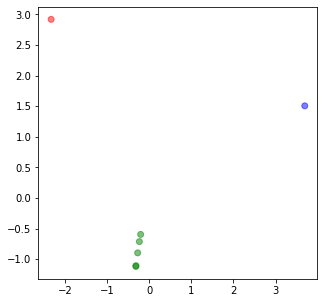

In [22]:
kmeans = KMeans(n_clusters=3, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [23]:
df['labels'] = colors
df

,x1,x2,labels
0,3.695270,1.505225,b
1,-0.236594,-0.711713,g
2,-0.277765,-0.895394,g
3,-0.207032,-0.594248,g
4,-2.334833,2.917628,r
5,-0.318274,-1.104219,g
6,-0.320772,-1.117279,g


### Glaucoma

In [24]:
x = corpus_diseased.norm_pos_x
y = corpus_diseased.norm_pos_y
arr = bias_boxes(x,y)

corpus = corpus_diseased
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus_2(corpus_new)

In [25]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')


INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [26]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

print(np.sum(pca.explained_variance_ratio_))
df = pd.DataFrame(data=X, columns=['x1', 'x2'])
df

0.5603054127869024


,x1,x2
0,3.101741,0.595211
1,-0.286335,-0.343545
2,-0.306688,-0.380241
3,-0.193425,-0.202262
4,-1.316201,2.492034
5,-0.378115,-0.668427
6,-0.620978,-1.492770


/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


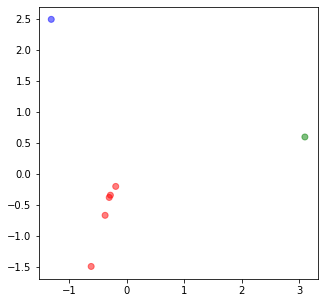

In [27]:
kmeans = KMeans(n_clusters=3, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [28]:
df['labels'] = colors
df

,x1,x2,labels
0,3.101741,0.595211,g
1,-0.286335,-0.343545,r
2,-0.306688,-0.380241,r
3,-0.193425,-0.202262,r
4,-1.316201,2.492034,b
5,-0.378115,-0.668427,r
6,-0.620978,-1.492770,r


## Zeiss - No Bias Boxes

### Healthy